conda install ffmpeg  
pip install pydub  
pip install ffmpeg moviepy  
conda install -c conda-forge librosa  
pip install SpeechRecognition  
pip install -U scikit-learn  
conda install -c anaconda nltk

In [2]:
import os
import matplotlib.pyplot as plt

import pydub
pydub.AudioSegment.converter = r"C:/Users/Kinza/anaconda3/envs/pie/Library/bin/ffmpeg.exe"

# Convert videos to audios

In [10]:
import moviepy.editor as mp
 
def video2audio(filename):
    '''Reads a mp4 video and saves it as a wav audio file'''
    my_clip = mp.VideoFileClip('videos/'+filename+'.mp4')
    my_clip.audio.write_audiofile('audios/'+filename+'.wav')

In [11]:
filenames = os.listdir('videos/')
filenames = list(map(lambda s: s.split('.mp4',2)[0],filenames))

list(map(video2audio, filenames));

chunk:   0%|          | 0/5801 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/alexis.przybylak@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 28/6682 [00:00<00:23, 277.97it/s, now=None]

MoviePy - Writing audio in audios/anna.gounot@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/5408 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/basile.rochut@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/781 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/boudabousarah@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 0/6402 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/clemi.petin@hotmail.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/5799 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/coop.pierre@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 26/6434 [00:00<00:24, 259.81it/s, now=None]

MoviePy - Writing audio in audios/Guillaume.de-battisti@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/977 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/heronheloise@outlook.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/6682 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/Hugo.SANCHEZ@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/6678 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/khadija.kasmi@me.com.wav


MoviePy - Done.


chunk:   0%|          | 0/4164 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/laura.hyest@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   1%|          | 25/3658 [00:00<00:14, 249.95it/s, now=None]

MoviePy - Writing audio in audios/laurine.meunier18@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 3/4448 [00:00<02:35, 28.65it/s, now=None]

MoviePy - Writing audio in audios/maloserra.p@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 16/3961 [00:00<00:24, 159.41it/s, now=None]

MoviePy - Writing audio in audios/marine.de-la-fontaine-de-fontenay-le-lievre-de@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 4/3329 [00:00<01:23, 40.00it/s, now=None]

MoviePy - Writing audio in audios/melekbenmosbah@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 0/6680 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/merhabencyrine@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 3/6645 [00:00<03:45, 29.49it/s, now=None]

MoviePy - Writing audio in audios/Pierre-antoine.DRICOT@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 3/2009 [00:00<01:08, 29.35it/s, now=None]

MoviePy - Writing audio in audios/pro.kaiskasmi@gmail.com.wav


MoviePy - Done.


chunk:   0%|          | 0/6460 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/Quentin.PRIETO@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 0/6746 [00:00<?, ?it/s, now=None]

MoviePy - Writing audio in audios/sophie.bonte@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 21/5086 [00:00<00:24, 209.15it/s, now=None]

MoviePy - Writing audio in audios/thomas.sentucq@student.isae-supaero.fr.wav


MoviePy - Done.


chunk:   0%|          | 8/4714 [00:00<00:59, 79.71it/s, now=None]

MoviePy - Writing audio in audios/thomas.sentucq@student.isae-supaero.fr1.wav


MoviePy - Done.


# Split on pauses

In [18]:
def split_questions(filename) :
    audio = pydub.AudioSegment.from_file('videos/'+filename+'.mp4','mp4')
    
    audio_chunks = pydub.silence.split_on_silence(audio, 
        # must be silent for at least 1.5 second
        min_silence_len=1500,

        # consider it silent if quieter than -16 dBFS
        silence_thresh=-50
    )

    print('There are',len(audio_chunks),'chunks')
    for i, chunk in enumerate(audio_chunks):
        out_file = 'splits/'+filename+"_chunk{0}.wav".format(i)
        print("Exporting", out_file)
        chunk.export(out_file, format="wav")

In [24]:
filenames = os.listdir('videos/')
filenames = list(map(lambda s: s.split('.mp4',2)[0],filenames)) 
print(split_questions(filenames[0])

SyntaxError: unexpected EOF while parsing (4068858804.py, line 5)

# Acoustic feature extraction

Some widely used features include Amplitude Envelope, Zero-Crossing Rate (ZCR), Root Mean Square (RMS) Energy, Spectral Centroid, Band Energy Ratio, and Spectral Bandwidth.

In [43]:
import librosa
import librosa.display
import numpy as np

def acoustic_features(filename):
    y , sr = librosa.load('audios/'+filename+'.wav', sr=None) #time series x , and sr is a sampling rate of x
    
    rmse = librosa.feature.rms(y=y)
    # Spectral centroid
    spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
    # Spectral bandwidth
    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    # Zero crossing rate
    zcr = librosa.feature.zero_crossing_rate(y)
    # Mel-Frequency Cepstral Coefficients(MFCCs)
    mfcc = librosa.feature.mfcc(y=y, sr=sr)
    # Chroma features
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    to_append = [np.mean(chroma_stft), np.mean(rmse), np.mean(spec_cent), np.mean(spec_bw),np.mean(rolloff),np.mean(zcr)]    
    for e in mfcc:
        to_append.append(np.mean(e))

    return to_append

In [44]:
filenames = os.listdir('audios/')
filenames = list(map(lambda s: s.split('.wav',2)[0],filenames))
features = list(map(acoustic_features,filenames))

In [45]:
import pandas as pd

features = pd.DataFrame(features)
features.columns = ['chroma_stft','rms','spec_cent','spec_bw','rolloff','zcr']+['mfcc_'+str(i) for i in range(20)]
features.index = map(lambda s : s.split('@')[0],filenames)
features.to_csv('features.csv')

In [53]:
features.index = map(lambda s : s.split('@')[0],filenames)

In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3,random_state=0).fit(features)
features['classes'] = kmeans.predict(features)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [26] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
[pca] >Plot PC1 vs PC2 with loadings.


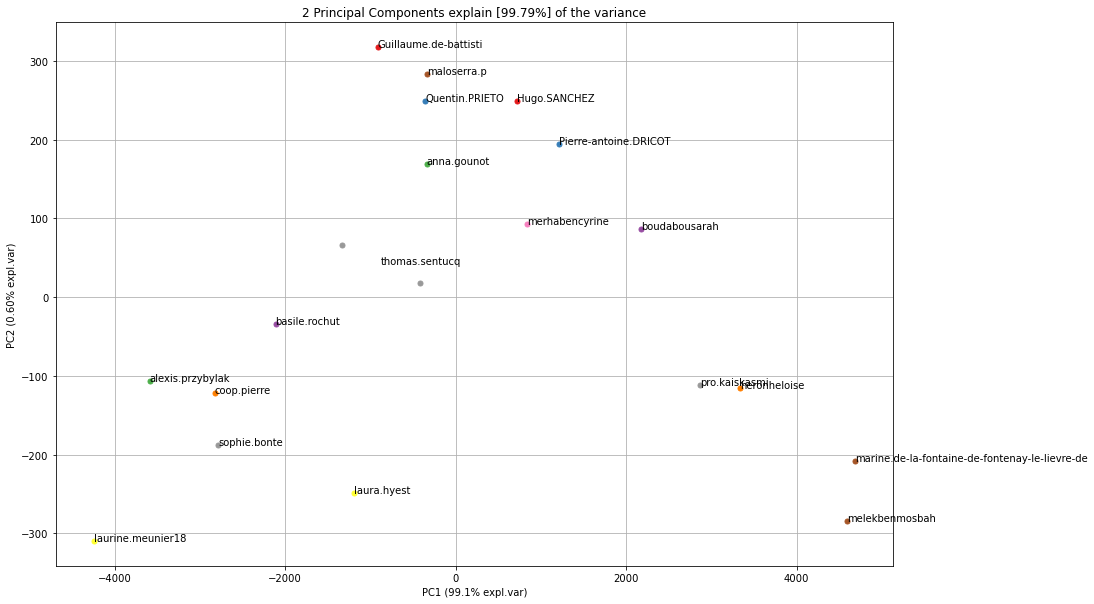

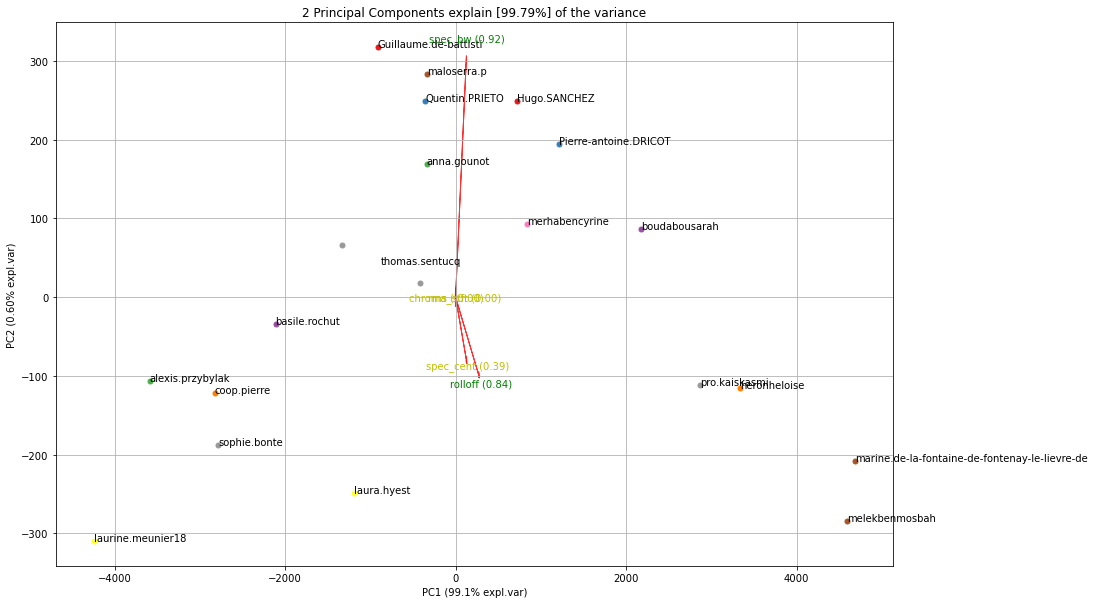

In [54]:
from pca import pca

model = pca(n_components=2)

# Fit transform
features_pca = model.fit_transform(features.drop('classes',axis=1))

# Scatter first 2 PCs
fig, ax = model.scatter(legend=False)

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=5,legend=False)

# Lexical feature extraction

In [72]:
import speech_recognition as sr 

def speech_recognition(filename):
    r = sr.Recognizer()
    audio = sr.AudioFile('splits/'+filename+'.wav')
    with audio as source:
        audio_file = r.record(source)
    
    result = r.recognize_google(audio_file,language = 'fr-FR', show_all=False)

    return result

result = speech_recognition(filenames[1])

"en ce qui concerne une expérience dans un milieu international je voulais vous parler de mon stage en États-Unis à l'université de Vienne donc je suis parti avec mes camarades de la promotion de français université américaine nos de 8h était espagnol et nous étions au travail on aussi avec un étudiant dans le car donc c'était vraiment très international donc c'était sur la production électrique toutes les semaines et surtout pouvoir travailler sous pression quand c'est nécessaire"

In [76]:
from nltk.stem.snowball import FrenchStemmer
from nltk import wordpunct_tokenize          
from nltk.corpus import stopwords
from nltk.corpus import words
from string import punctuation
from sklearn.feature_extraction.text import CountVectorizer

In [82]:
class FrenchStemTokenizer(object):
    def __init__(self, remove_non_words=True):
        self.st = FrenchStemmer()
        self.stopwords = set(stopwords.words('french'))
        self.words = set(words.words())
        self.remove_non_words = remove_non_words
    def __call__(self, doc):
        # tokenize words and punctuation
        word_list = wordpunct_tokenize(doc)
        # remove stopwords
        word_list = [word for word in word_list if word not in self.stopwords]
        # remove non words
        if(self.remove_non_words):
            word_list = [word for word in word_list if word in self.words]
        # remove 1-character words
        word_list = [word for word in word_list if len(word)>1]
        # remove non alpha
        word_list = [word for word in word_list if word.isalpha()]
        return [self.st.stem(t) for t in word_list]

In [87]:
countvect = CountVectorizer(tokenizer=FrenchStemTokenizer(remove_non_words=True))
text_fts = countvect.fit_transform([result])
feat2word = {v: k for k, v in countvect.vocabulary_.items()}

countvect.get_feature_names()

['car',
 'international',
 'milieu',
 'pression',
 'product',
 'promot',
 'stag',
 'surtout',
 'travail']